In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_dataset=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# no of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
#describe
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# Data Types

loan_dataset.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#filling na
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0], inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0], inplace=True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0], inplace=True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0], inplace=True)
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(), inplace=True)
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0], inplace=True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0], inplace=True)

In [11]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Univariate Analysis

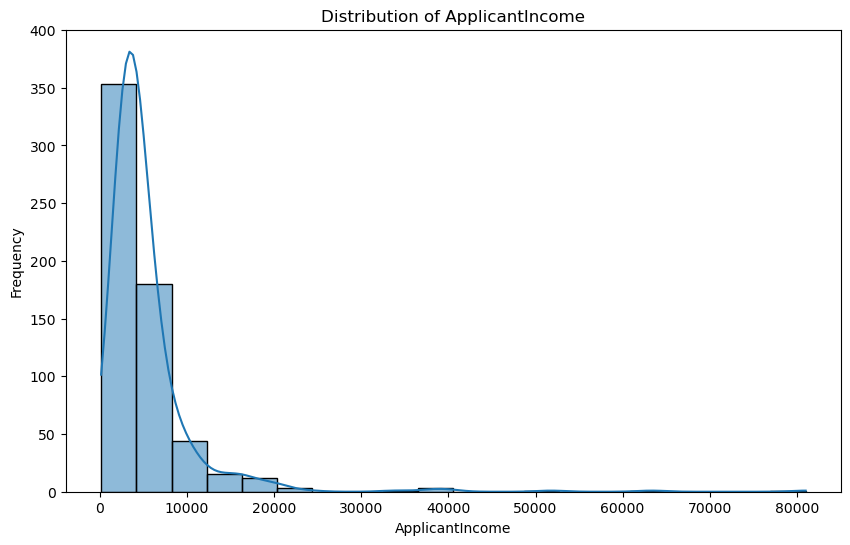

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_dataset['ApplicantIncome'], bins=20, kde=True)
plt.title("Distribution of ApplicantIncome")
plt.xlabel("ApplicantIncome")
plt.ylabel("Frequency")
plt.show()

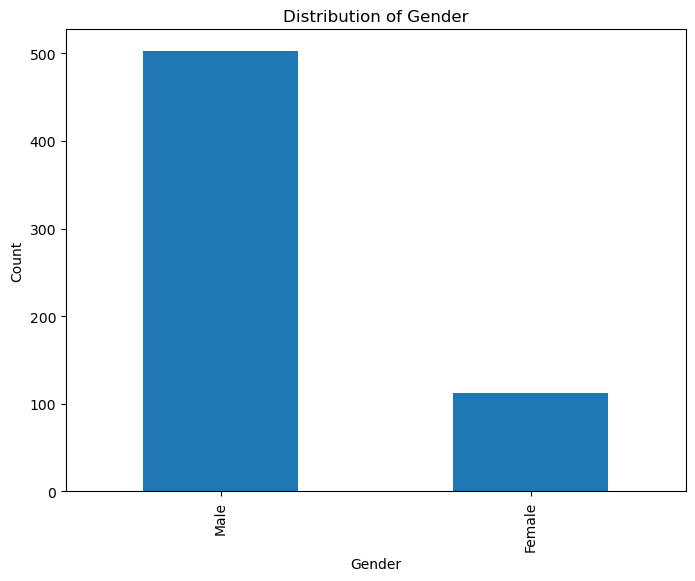

In [16]:
plt.figure(figsize=(8, 6))
loan_dataset['Gender'].value_counts().plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

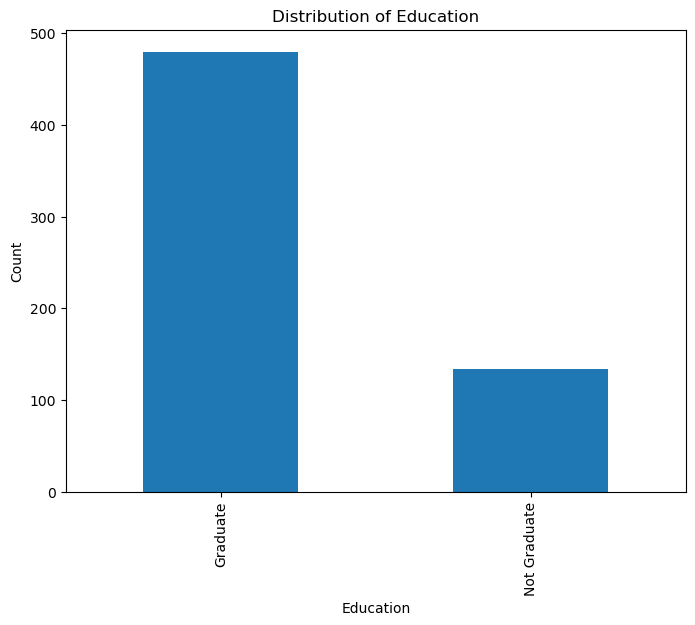

In [17]:
plt.figure(figsize=(8, 6))
loan_dataset['Education'].value_counts().plot(kind='bar')
plt.title("Distribution of Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

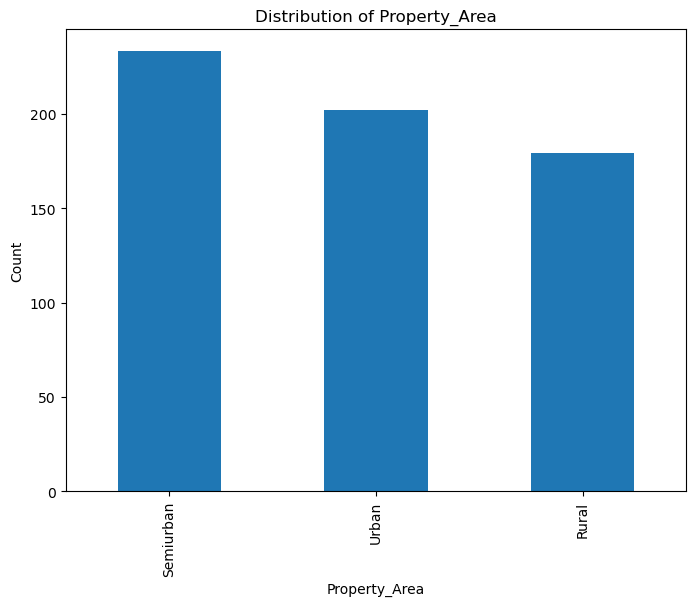

In [18]:
plt.figure(figsize=(8, 6))
loan_dataset['Property_Area'].value_counts().plot(kind='bar')
plt.title("Distribution of Property_Area")
plt.xlabel("Property_Area")
plt.ylabel("Count")
plt.show()

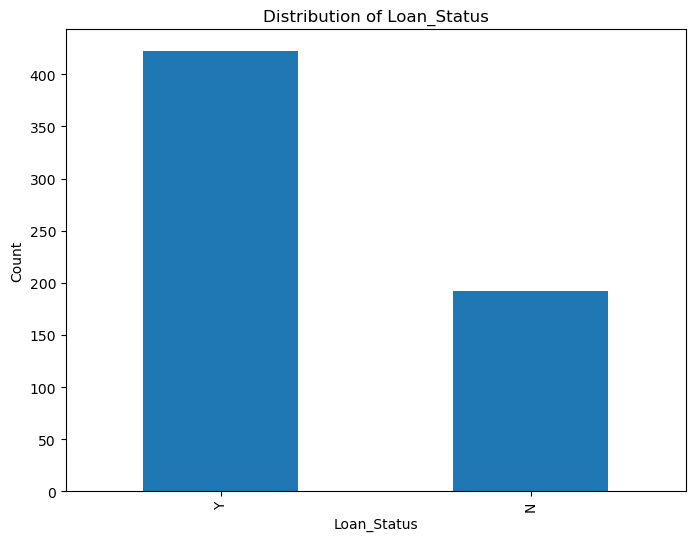

In [19]:
plt.figure(figsize=(8, 6))
loan_dataset['Loan_Status'].value_counts().plot(kind='bar')
plt.title("Distribution of Loan_Status")
plt.xlabel("Loan_Status")
plt.ylabel("Count")
plt.show()

In [20]:
#Bivariate Analysis


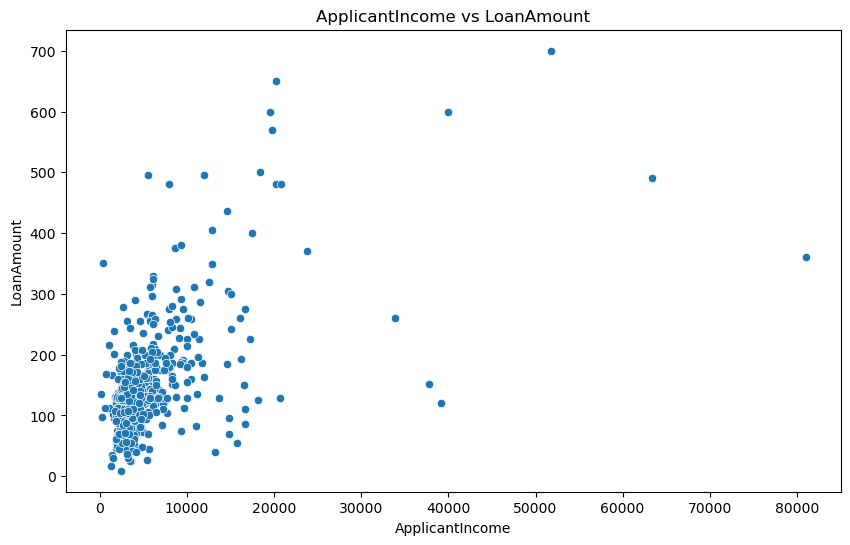

In [21]:
# Relationship between ApplicantIncome and LoanAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loan_dataset)
plt.title("ApplicantIncome vs LoanAmount")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

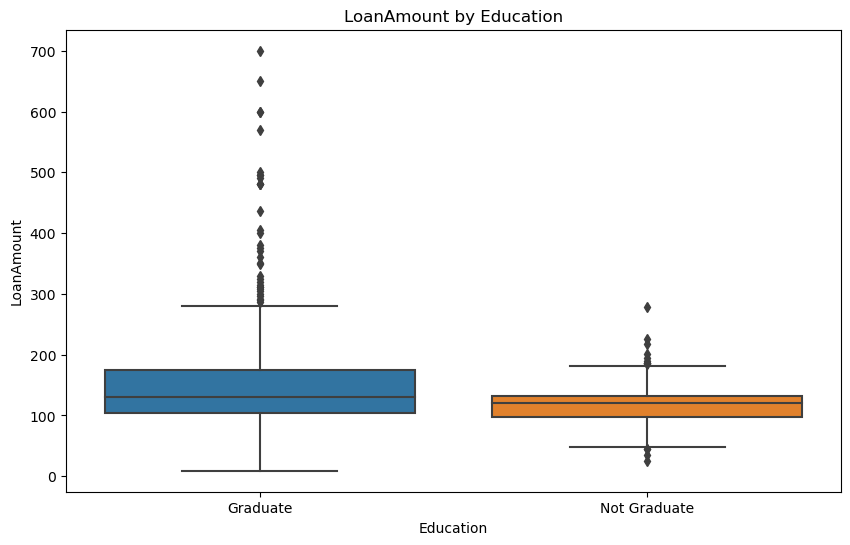

In [22]:
# Box plot of LoanAmount grouped by Education
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='LoanAmount', data=loan_dataset)
plt.title("LoanAmount by Education")
plt.xlabel("Education")
plt.ylabel("LoanAmount")
plt.show()

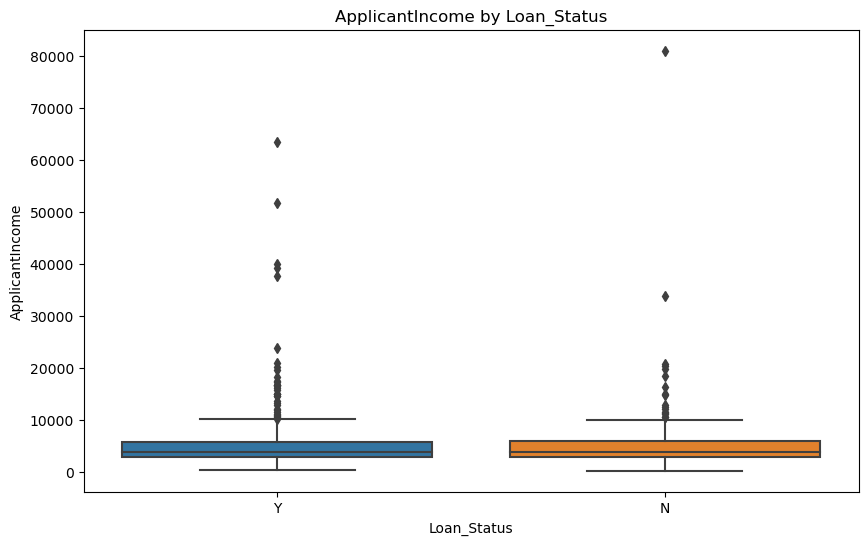

In [23]:
# Box plot of ApplicantIncome grouped by Loan_Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_dataset)
plt.title("ApplicantIncome by Loan_Status")
plt.xlabel("Loan_Status")
plt.ylabel("ApplicantIncome")
plt.show()

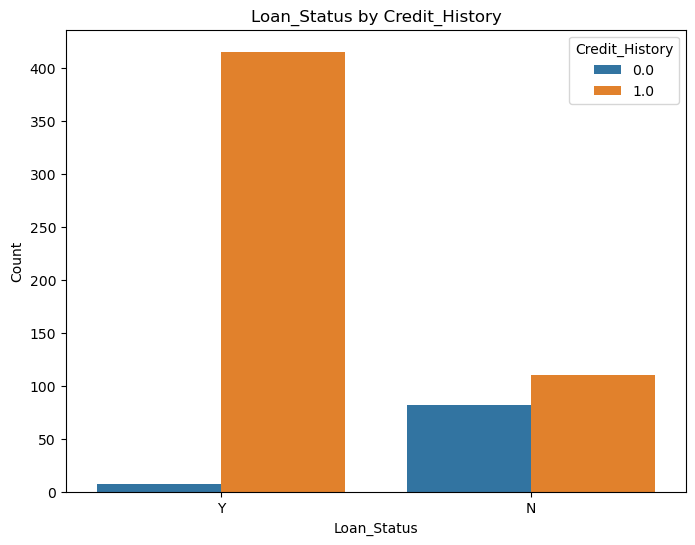

In [24]:
# Bar plot of Loan_Status grouped by Credit_History
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', hue='Credit_History', data=loan_dataset)
plt.title("Loan_Status by Credit_History")
plt.xlabel("Loan_Status")
plt.ylabel("Count")
plt.show()


In [ ]:
#Preprocessing

In [25]:
#droping loan id
loan_dataset.drop(columns=['Loan_ID'], inplace=True)

In [27]:
loan_dataset["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
#replacing value of 3+ to 4
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [30]:
loan_dataset["Dependents"].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [31]:
#label encoding
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},
                      "Loan_Status":{'N':0,'Y':1}},inplace=True)



In [32]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
loan_dataset.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [35]:
loan_dataset['Gender'] = loan_dataset['Gender'].astype(object)
loan_dataset['Married'] = loan_dataset['Married'].astype(object)
loan_dataset['Education'] = loan_dataset['Education'].astype(object)
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].astype(object)
loan_dataset['Property_Area'] = loan_dataset['Property_Area'].astype(object)


In [51]:
loan_dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status            int32
dtype: object

In [38]:
loan_dataset["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [39]:
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].astype(object)

In [40]:
loan_dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [41]:
#model bulding

In [59]:
X = loan_dataset.drop(columns=['Loan_Status'])
y = loan_dataset['Loan_Status']

In [60]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Build and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6829268292682927

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        43
           1       0.75      0.78      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.65       123
weighted avg       0.68      0.68      0.68       123


Confusion Matrix:
[[22 21]
 [18 62]]


In [64]:
acc_df = pd.DataFrame({'Model': ['decision tree'],
                             'Accuracy': [accuracy]})
acc_df

,Model,Accuracy
0,decision tree,0.682927


In [65]:
#model improvement

In [66]:
#Stratified model
X = loan_dataset.drop(columns=['Loan_Status'])
y = loan_dataset['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7560975609756098

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.62        38
           1       0.84      0.80      0.82        85

    accuracy                           0.76       123
   macro avg       0.72      0.73      0.72       123
weighted avg       0.76      0.76      0.76       123


Confusion Matrix:
[[25 13]
 [17 68]]


In [81]:
new_row = {'Model': 'decision tree-stratify', 'Accuracy': accuracy}


acc_df =acc_df.append(new_row, ignore_index=True)
acc_df

,Model,Accuracy
0,decision tree,0.682927
1,decision tree-stratify,0.756098


In [69]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

# Print classification report
print("\nRandom Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("\nRandom Forest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8373983739837398

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123


Random Forest Model Confusion Matrix:
[[24 14]
 [ 6 79]]


In [83]:
new_row = {'Model': 'Random Forest', 'Accuracy': accuracy_rf}


acc_df = acc_df.append(new_row,ignore_index=True)
acc_df

,Model,Accuracy
0,decision tree,0.682927
1,decision tree-stratify,0.756098
2,Random Forest,0.837398


In [84]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2']  
}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with the Random Forest classifier and parameter grid
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("Tuned Random Forest Model Accuracy:", accuracy_rf_tuned)

# Print classification report
print("\nTuned Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

# Print confusion matrix
print("\nTuned Random Forest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest Model Accuracy: 0.8617886178861789

Tuned Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73        38
           1       0.85      0.98      0.91        85

    accuracy                           0.86       123
   macro avg       0.88      0.79      0.82       123
weighted avg       0.87      0.86      0.85       123


Tuned Random Forest Model Confusion Matrix:
[[23 15]
 [ 2 83]]


In [89]:

new_row = {'Model': 'Tuned Random Forest ', 'Accuracy': accuracy_rf_tuned}


acc_df = acc_df.append(new_row,ignore_index=True)
acc_df

,Model,Accuracy
0,decision tree,0.682927
1,decision tree-stratify,0.756098
2,Random Forest,0.837398
3,Tuned Random Forest,0.861789


In [92]:
acc_df.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
3,Tuned Random Forest,0.861789
2,Random Forest,0.837398
1,decision tree-stratify,0.756098
0,decision tree,0.682927


In [94]:
#Tuned Random Fores is having highest accurecy score

#### Predictive system

In [102]:
input_data = (1,1,0,0,0,5849,0.0,128.0,360.0,1.0,2)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('High chance for approval')
else:
  print('low chance for approval')

[1]
High chance for approval
